<h1>Communicate Data Findings</h1>


<h3>Introduction :<h3>
    <ul>
        <li>This datasets came from reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.</li>
        <li>Data source from United States Department of Transportation - Bureau of transportation Statistics</li>
   </ul>

   <h3>Questions tring to Answer it :</h3>
   <ol><li>Are there certain destination or arrival cities that are home to more cancellations? </li>
            <li>what is the change in delay rate over years</li>
        <li>What are the preferred times for flights to occur?Are there any changes over multiple years? </li>
        </ol>

In [1]:
# First we will import libiraries that we will used in our project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sb

%matplotlib inline

<p><b>we will explore data sets to choose among of them </p>

In [2]:
# we notice that there is a lot of column is null specially Delays column which we critical needed to figure out what is the main factor for delaying
flights_1987 = pd.read_csv('1987.csv',encoding='ISO-8859-1') 
flights_1987.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311826 entries, 0 to 1311825
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Year               1311826 non-null  int64  
 1   Month              1311826 non-null  int64  
 2   DayofMonth         1311826 non-null  int64  
 3   DayOfWeek          1311826 non-null  int64  
 4   DepTime            1292141 non-null  float64
 5   CRSDepTime         1311826 non-null  int64  
 6   ArrTime            1288326 non-null  float64
 7   CRSArrTime         1311826 non-null  int64  
 8   UniqueCarrier      1311826 non-null  object 
 9   FlightNum          1311826 non-null  int64  
 10  TailNum            0 non-null        float64
 11  ActualElapsedTime  1288326 non-null  float64
 12  CRSElapsedTime     1311826 non-null  int64  
 13  AirTime            0 non-null        float64
 14  ArrDelay           1288326 non-null  float64
 15  DepDelay           1292141 non-n

In [3]:
flights_1996 = pd.read_csv('1996.csv',encoding='ISO-8859-1') 
print(flights_1996.shape)
flights_1996.info()

(5351983, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5351983 entries, 0 to 5351982
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   float64
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  Weat

In [4]:
# we notice that there is a lot of missing data specially Delays column which we critical needed to figure out what is the main factor for delaying
flights_1996.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               128536
CRSDepTime                 0
ArrTime               142657
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                    0
ActualElapsedTime     142657
CRSElapsedTime          4646
AirTime               142657
ArrDelay              142657
DepDelay              128536
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     5351983
Diverted                   0
CarrierDelay         5351983
WeatherDelay         5351983
NASDelay             5351983
SecurityDelay        5351983
LateAircraftDelay    5351983
dtype: int64

<b>After exploring most dataset I found that they start record delays reason from the year 2006 so I will work on 2006,2007,2008 data sets<br/>
Important note: The year 2008 has only the first 4 months of the year so it is not accurate

In [5]:
# we need read airports dataset to get airport codes
airports = pd.read_csv('airports.csv')

In [6]:
flights_2008 =pd.read_csv('2008.csv',encoding='ISO-8859-1') 


In [7]:
flights_2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [8]:
flights_2008.head()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   1343.0        1325   1451.0   
1  2008      1           3          4   1125.0        1120   1247.0   
2  2008      1           3          4   2009.0        2015   2136.0   
3  2008      1           3          4    903.0         855   1203.0   
4  2008      1           3          4   1423.0        1400   1726.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        1435            WN        588  ...    4.0      9.0          0   
1        1245            WN       1343  ...    3.0      8.0          0   
2        2140            WN       3841  ...    2.0     14.0          0   
3        1205            WN          3  ...    5.0      7.0          0   
4        1710            WN         25  ...    6.0     10.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0               NaN         0          16.0          0.0      0.0   
1               NaN         0           NaN          NaN      NaN   
2               NaN         0           NaN          NaN      NaN   
3               NaN         0           NaN          NaN      NaN   
4               NaN         0          16.0          0.0      0.0   

   SecurityDelay  LateAircraftDelay  
0            0.0                0.0  
1            NaN                NaN  
2            NaN                NaN  
3            NaN                NaN  
4            0.0                0.0  

[5 rows x 29 columns]

In [9]:
flights_2008.describe()

Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  2389217.0  2.389217e+06  2.389217e+06  2.389217e+06  2.324775e+06   
mean      2008.0  2.505009e+00  1.566386e+01  3.909625e+00  1.340018e+03   
std          0.0  1.121493e+00  8.750405e+00  1.980431e+00  4.802717e+02   
min       2008.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%       2008.0  1.000000e+00  8.000000e+00  2.000000e+00  9.300000e+02   
50%       2008.0  3.000000e+00  1.600000e+01  4.000000e+00  1.330000e+03   
75%       2008.0  4.000000e+00  2.300000e+01  6.000000e+00  1.733000e+03   
max       2008.0  4.000000e+00  3.100000e+01  7.000000e+00  2.400000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  2.389217e+06  2.319121e+06  2.389217e+06  2.389217e+06   
mean   1.329992e+03  1.485835e+03  1.496744e+03  2.213888e+03   
std    4.657833e+02  5.081295e+02  4.845238e+02  1.951392e+03   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    9.270000e+02  1.110000e+03  1.115000e+03  6.050000e+02   
50%    1.325000e+03  1.516000e+03  1.520000e+03  1.544000e+03   
75%    1.720000e+03  1.914000e+03  1.910000e+03  3.631000e+03   
max    2.359000e+03  2.400000e+03  2.400000e+03  9.741000e+03   

       ActualElapsedTime  ...      Distance        TaxiIn       TaxiOut  \
count       2.319121e+06  ...  2.389217e+06  2.319121e+06  2.324775e+06   
mean        1.286189e+02  ...  7.261589e+02  6.839862e+00  1.668584e+01   
std         7.025303e+01  ...  5.571763e+02  4.846435e+00  1.102905e+01   
min         1.400000e+01  ...  1.700000e+01  0.000000e+00  0.000000e+00   
25%         7.800000e+01  ...  3.250000e+02  4.000000e+00  1.000000e+01   
50%         1.110000e+02  ...  5.830000e+02  6.000000e+00  1.400000e+01   
75%         1.600000e+02  ...  9.570000e+02  8.000000e+00  1.900000e+01   
max         9.050000e+02  ...  4.962000e+03  2.130000e+02  3.830000e+02   

          Cancelled      Diverted   CarrierDelay   WeatherDelay  \
count  2.389217e+06  2.389217e+06  584583.000000  584583.000000   
mean   2.697202e-02  2.366466e-03      15.752957       2.938243   
std    1.620017e-01  4.858875e-02      40.035487      19.166662   
min    0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    0.000000e+00  0.000000e+00       0.000000       0.000000   
50%    0.000000e+00  0.000000e+00       0.000000       0.000000   
75%    0.000000e+00  0.000000e+00      16.000000       0.000000   
max    1.000000e+00  1.000000e+00    2436.000000    1148.000000   

            NASDelay  SecurityDelay  LateAircraftDelay  
count  584583.000000  584583.000000      584583.000000  
mean       16.158462       0.080459          20.976710  
std        30.534167       1.742579          38.617154  
min         0.000000       0.000000           0.000000  
25%         0.000000       0.000000           0.000000  
50%         5.000000       0.000000           0.000000  
75%        20.000000       0.000000          27.000000  
max      1357.000000     392.000000        1254.000000  

[8 rows x 24 columns]

In [10]:
flights_2006 = pd.read_csv('2006.csv')

In [11]:
print(flights_2006.shape)
flights_2006.info()

(7141922, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141922 entries, 0 to 7141921
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  Weat

In [12]:
flights_2007 = pd.read_csv('2007.csv')
print(flights_2007.shape)
flights_2007.info()

(7453215, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  Weat

<b>Due to datasets size, I will choose columns that I will use it to explore data </b>

In [13]:
#we will start to concate data to used for figure out what is the most city is the home of cancelation rate 
#we need explore column we will used it Origin , Dest , and Cancelled and CancellationCode
print (flights_2006['Origin'].value_counts())
print('----------------')
print (flights_2006['Dest'].value_counts())
print('----------------')
print (flights_2006['Cancelled'].value_counts())
print('----------------')
print (flights_2006['CancellationCode'].value_counts())

ATL    407971
ORD    373736
DFW    301163
LAX    233788
DEN    232476
        ...  
OAJ        62
TTN        51
HKY        42
HVN         3
CKB         1
Name: Origin, Length: 289, dtype: int64
----------------
ATL    404829
ORD    373799
DFW    301312
LAX    233900
DEN    232365
        ...  
PUB         2
RCA         1
LBF         1
LAR         1
SUX         1
Name: Dest, Length: 296, dtype: int64
----------------
0    7019988
1     121934
Name: Cancelled, dtype: int64
----------------
A    55655
B    37913
C    28209
D      157
Name: CancellationCode, dtype: int64


In [14]:
#to avoid recurrence i made explore for 2007 and 2008 datset and i found it the same
#now will will concate the three data set 
cancellation_col = ['Origin','Dest','Cancelled','CancellationCode']
cancellations = pd.concat([flights_2006[cancellation_col],flights_2007[cancellation_col],flights_2008[cancellation_col]])

In [15]:
print(cancellations.shape)
cancellations.head()

(16984354, 4)


Origin Dest  Cancelled CancellationCode
0    ATL  PHX          0              NaN
1    ATL  PHX          0              NaN
2    ATL  PHX          0              NaN
3    AUS  PHX          0              NaN
4    AUS  PHX          0              NaN

In [16]:
cancellations.isna().sum()

Origin                     0
Dest                       0
Cancelled                  0
CancellationCode    16637229
dtype: int64

In [17]:
#to get more accurate data i will caluculate the percentage of most cancelled flights  
cancellations_Origin = cancellations.groupby(cancellations['Origin']).mean().sort_values(ascending = False,by='Cancelled')

cancellations_Dest = cancellations.groupby(cancellations['Dest']).mean().sort_values(ascending = False,by='Cancelled')


<b><font color='blue'>we will use the following two function to add the name of airports to the legend of our graph</b>

In [18]:
#source : https://stackoverflow.com/questions/43585333/seaborn-countplot-set-legend-for-x-values
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]   

In [19]:
def add_legends (ax):
    t = ax.get_xticklabels()
    labeldic = dict(zip(airports_codes, airports_names))
    labels = [labeldic[h.get_text()]  for h in t]
    handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]
    plt.xticks(rotation=90);
    ax.legend(handles, labels, handler_map={tuple : TextHandler()}) ;

In [20]:
#get airports name
airports_codes =airports['iata'].tolist()
airports_names = airports['airport'].tolist()

### What is the Airport has the highest cancellation Rate?

### Top 20 Airports has Hights Departual Cancellation Rate.

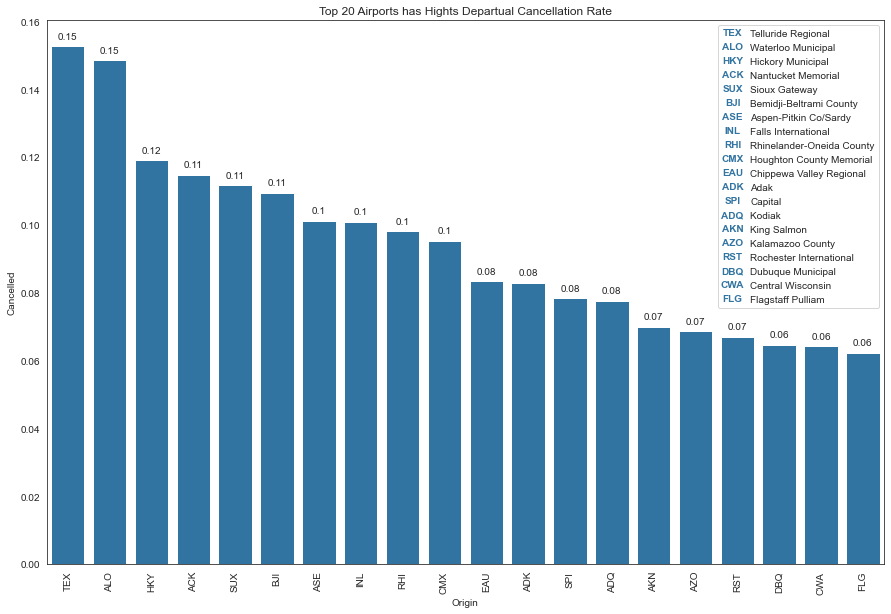

In [50]:
basic_color = sb.color_palette()[0]
plt.figure(figsize=[15,10])
ax = sb.barplot(x=cancellations_Origin.index[0:20],y=cancellations_Origin['Cancelled'][0:20],color=basic_color)
add_legends(ax)
for p in ax.patches:    
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',  va='center',xytext=(0, 10),textcoords='offset points' )                 

plt.title('Top 20 Airports has Hights Departual Cancellation Rate');

### Top 20 Airports has Hights Arrival Cancellation Rate

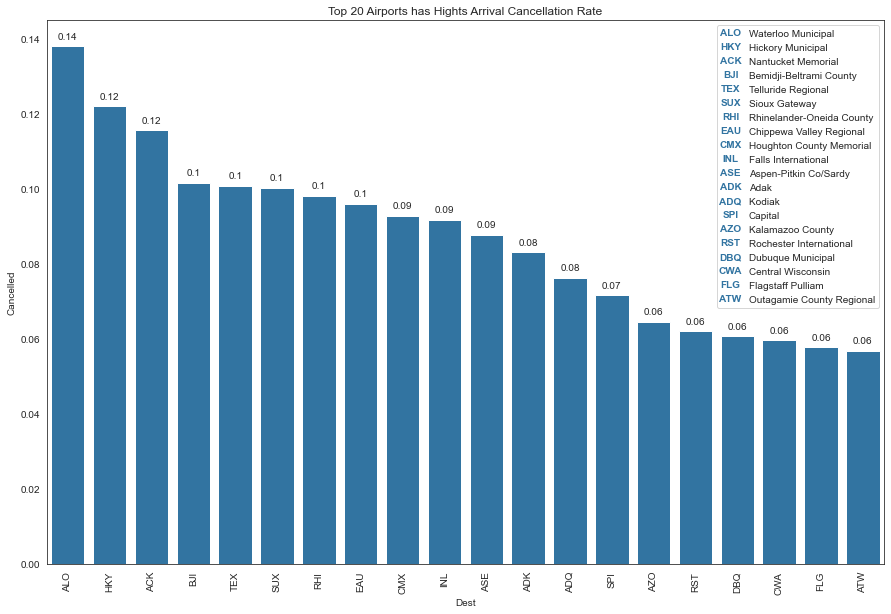

In [49]:
plt.figure(figsize=[15,10])
ax = sb.barplot(x=cancellations_Dest.index[0:20],y=cancellations_Dest['Cancelled'][0:20],color=basic_color)
add_legends(ax)
plt.title('Top 20 Airports has Hights Arrival Cancellation Rate');
for p in ax.patches:    
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',  va='center',xytext=(0, 10),textcoords='offset points' )                 

In [23]:
#by using cancellation code we try to know what is the most  reason for cancelation
carrier = cancellations.query('CancellationCode=="A"')['CancellationCode'].count()/cancellations[cancellations['Cancelled']==1].shape[0]
weather=cancellations.query('CancellationCode=="B"')['CancellationCode'].count()/cancellations[cancellations['Cancelled']==1].shape[0]
NAS = cancellations.query('CancellationCode=="C"')['CancellationCode'].count()/cancellations[cancellations['Cancelled']==1].shape[0]
security = cancellations.query('CancellationCode=="D"')['CancellationCode'].count()/cancellations[cancellations['Cancelled']==1].shape[0]


In [24]:
cancellation_types=[carrier,weather,NAS,security]

### The rates of each reason behind flight cancellation

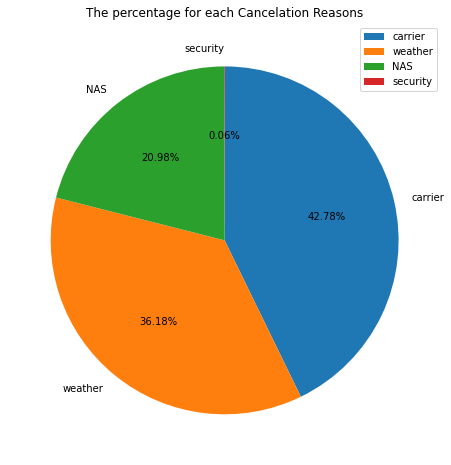

In [25]:
#we will create a 1D arrat from the previous precentage to plot pie chart for each cancelation reason   
fig = plt.figure(figsize=(8,8));
plt.pie(cancellation_types,autopct='%1.2f%%',labels=['carrier','weather','NAS','security'],startangle = 90, counterclock = False);
plt.legend();
plt.title('The percentage for each Cancelation Reasons')
plt.show();

<b>Carrier Delay is the most reason behind  the flight cancellation for both arrival and destination with a percentage of 42.78% and the less one is security <br/>
note  :"NAS" are the type of weather delays that could be reduced with corrective action by the airports or the Federal Aviation

### Conclusion for cancellation Section :
<b>Telluride airport  has the highest departure cancellation number percentage 15% from total departure flights then Watelloo Munitipal airport and so on as appear in the previous grap <br/>

Watelloo Munitipal airport has the highest cancellation rate for arrival flights with percentage near to 14% 


## what is the change in delay rate over years? 

<font color='blue'><b>A flight delay is when an airline flight takes off and/or lands later than its scheduled time. The Federal Aviation Administration (FAA) considers a flight to be delayed when it is 15 minutes later than its scheduled time. A cancellation occurs when the airline does not operate the flight at all for a certain reason.
<br/>source :  https://en.wikipedia.org/wiki/Flight_cancellation_and_delay#:~:text=A%20flight%20delay%20is%20when,all%20for%20a%20certain%20reason.</b>

In [26]:
#first we concat three datset with colums that i needed for exploration
filterd_col= ['UniqueCarrier','Origin','Dest','Year','Month','DayofMonth','DayOfWeek','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','DepTime','ArrTime']


In [27]:
delays_2006 = flights_2006[filterd_col]
total_delays_2006 = delays_2006.query('CarrierDelay > 15.0 or WeatherDelay >15.0 or NASDelay > 15 or SecurityDelay > 15.0 or LateAircraftDelay >15 ')

In [28]:
delays_2007 = flights_2007[filterd_col]
total_delays_2007 = delays_2007.query('CarrierDelay > 15.0 or WeatherDelay >15.0 or NASDelay > 15 or SecurityDelay > 15.0 or LateAircraftDelay >15 ')

In [29]:
delays_2008 = flights_2008[filterd_col]
total_delays_2008 = delays_2008.query('CarrierDelay > 15.0 or WeatherDelay >15.0 or NASDelay > 15 or SecurityDelay > 15.0 or LateAircraftDelay >15 ')

In [30]:
#Create dataframe contain 3 datasets
delays = pd.concat([total_delays_2006,total_delays_2007,total_delays_2008])

### create a correlation matrix by using heat map and matrix to figure out what is the most factor affecting flight delays

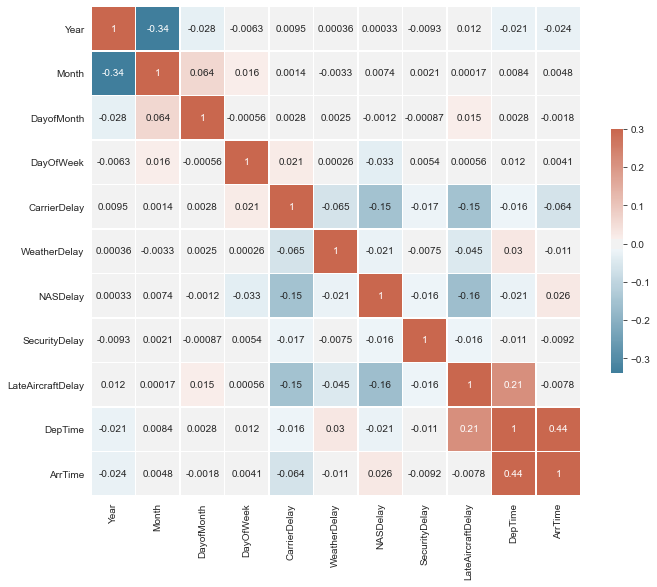

In [31]:
#create colleration materix by using heat map and matrix to figure out what is the most factor affecting on flight delays
from string import ascii_letters

sb.set_style(style="white")

# Compute the correlation matrix
corr =delays.corr()

# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr,  cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<b>Almost the correlation between all variable is very small and we can't get a clear vision if there is one variable effect to another so we will using another approach in order to try to depict flight 

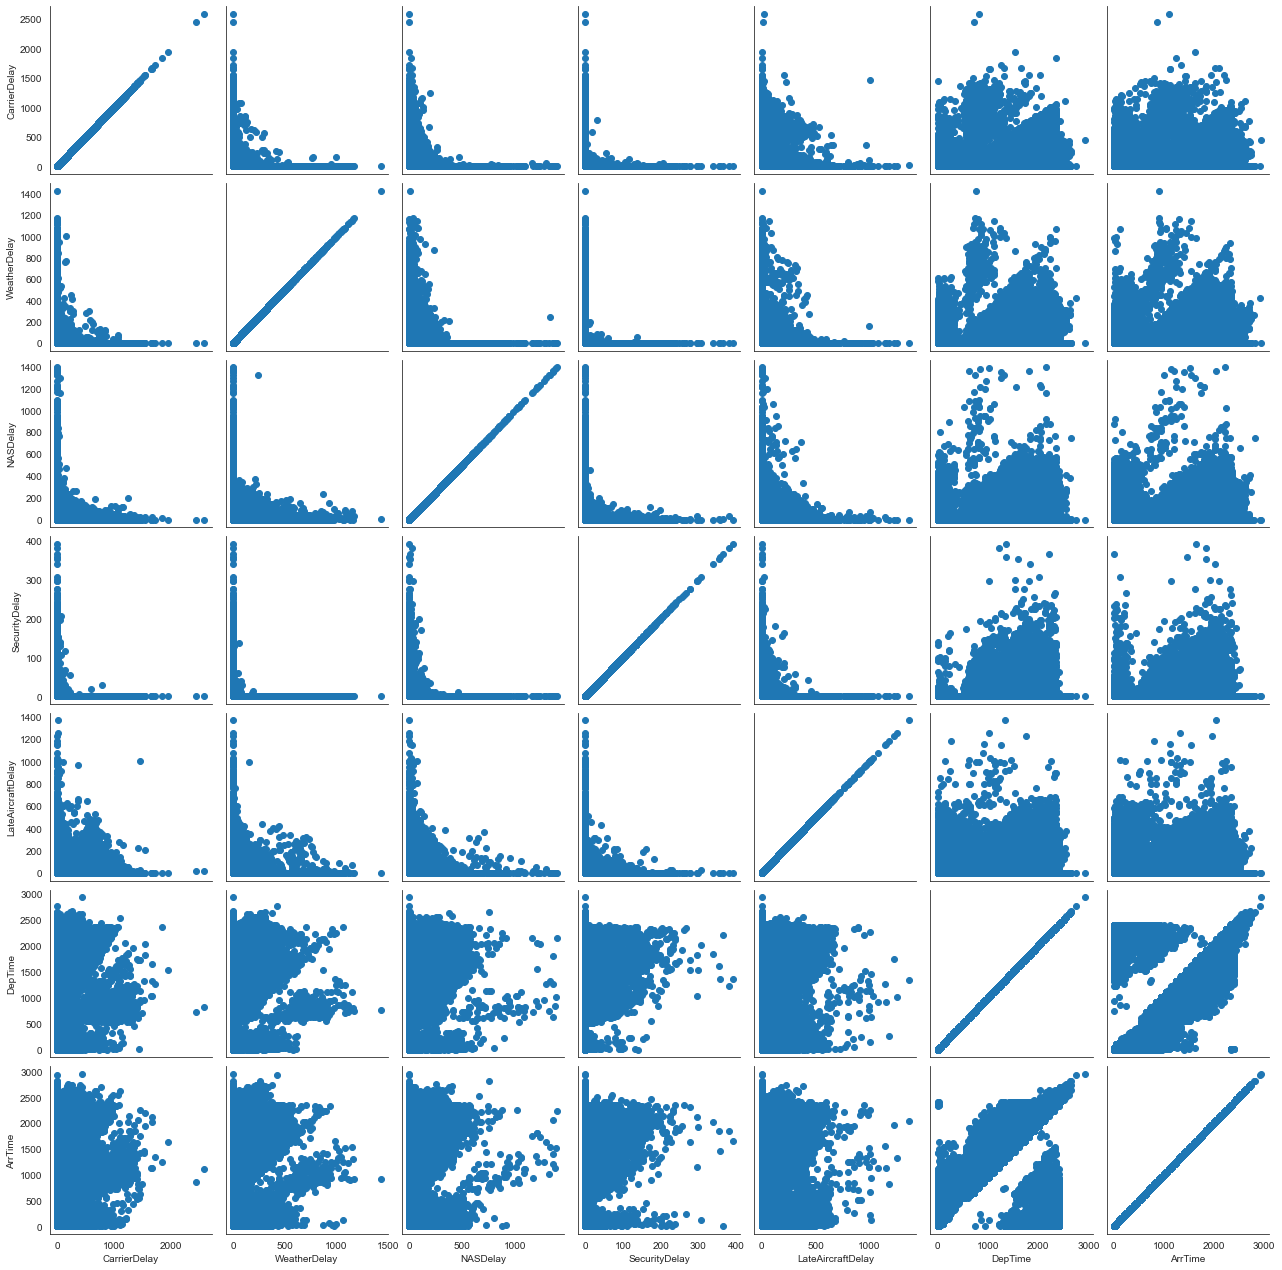

In [32]:
# i will try to see if there is a relation ship between on delay and another 
g = sb.PairGrid(data = delays, vars = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay','DepTime','ArrTime']);
g.map(plt.scatter);

<b>if we compare four types of delays with DepTime and Arrive time we found that in the morning the delay rate is less than delays occurs in the evening by a small portion especially weather delay which is logic because the weather at night is worst than in the morning 

# <b>what is the change in delay rate over years? </b>

In [33]:
#create new column has total number of delays in minute
delays['Total_Delays'] = delays[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']].sum(axis=1)/60

### Total  delayed hours per Year

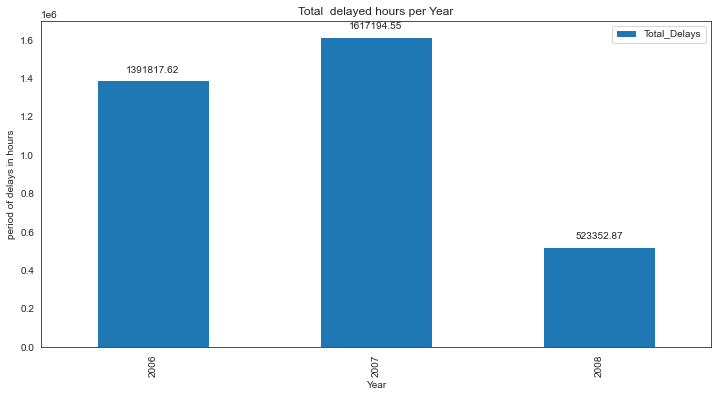

In [34]:
ax = delays.groupby('Year').agg({'Total_Delays':'sum'}).plot(kind='bar',title='Total  delayed hours per Year',figsize=(12,6))
plt.ylabel('period of delays in hours');
for p in ax.patches:    
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2.,p.get_height()),ha='center',  va='center',xytext=(0, 10),textcoords='offset points' )                 

### Avg. delay time in minutes  per month over three years

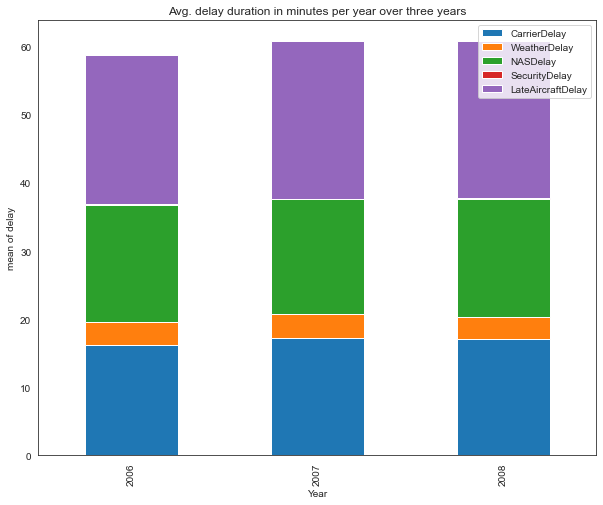

In [35]:
delays.groupby('Year').agg({'CarrierDelay':'mean', 'WeatherDelay':'mean','NASDelay':'mean','SecurityDelay':'mean','LateAircraftDelay':'mean'}).plot(figsize=(10,8),kind='bar',stacked=True)
plt.title('Avg. delay duration in minutes per year over three years')
plt.ylabel('mean of delay')
plt.show()

##  What is the change in the delay period (in minutes) for each month over three years

### change in Total delays  over months from 2006 to 2008

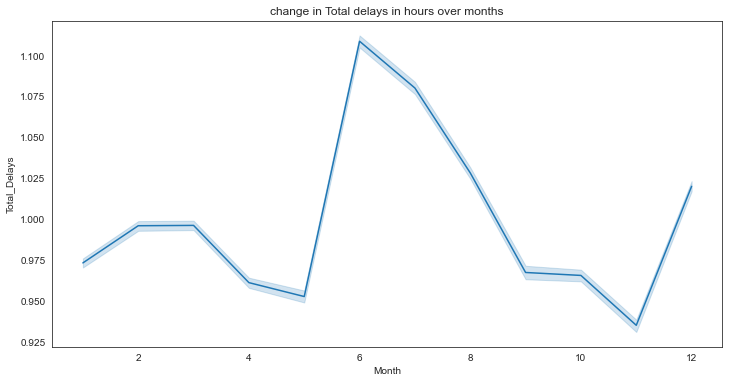

In [36]:
plt.figure(figsize=(12,6));
sb.lineplot(data=delays,x='Month',y='Total_Delays');
plt.title('change in Total delays in hours over months');

### Avg. delays per month over three years

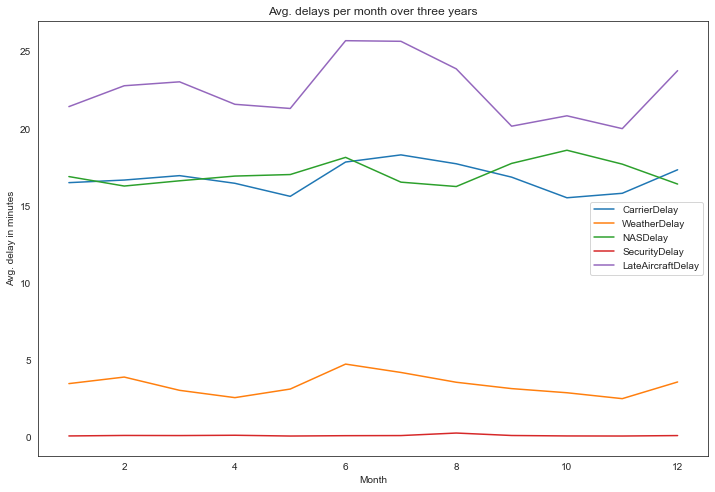

In [37]:
delays.groupby('Month').agg({'CarrierDelay':'mean', 'WeatherDelay':'mean','NASDelay':'mean','SecurityDelay':'mean','LateAircraftDelay':'mean'}).plot(figsize=(12,8),title='Avg. delays per month over three years')
plt.ylabel('Avg. delay in minutes')
plt.show()

### Conclusion for delay Section :
The most delay occurred in July and August the most  and most year have delay rate 2007 but note that year 2008 has the record for the first four months only<br/>
Late Air craft delay is the highest type of delay then NAS delay 

##  What are the preferred times for flights to occur?Are there any changes over multiple years?

In [38]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',  'August', 'September', 'October', 'November', 'December']
weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [39]:
all_flights = pd.concat([flights_2006[filterd_col],flights_2007[filterd_col],flights_2008[filterd_col]])

In [40]:
all_flights.shape

(16984354, 14)

In [41]:
#create 3 dataframe i used uniqueCarrier column because all of them is not  null
df_months = pd.DataFrame({'months':months,'number_of_flight':all_flights.groupby('Month').count()['UniqueCarrier'],'flight_delayed':delays.groupby('Month').count()['UniqueCarrier']})
df_days_of_months = pd.DataFrame({'days':np.arange(1,32),'number_of_flight':all_flights.groupby('DayofMonth').count()['UniqueCarrier'],'flight_delayed':delays.groupby('DayofMonth').count()['UniqueCarrier']})
df_weeks = pd.DataFrame({'weekDays':weekDays,'number_of_flight':all_flights.groupby('DayOfWeek').count()['UniqueCarrier'],'flight_delayed':delays.groupby('DayOfWeek').count()['UniqueCarrier']})

### Flight number VS Delay Flights by month between 2006 to 2008

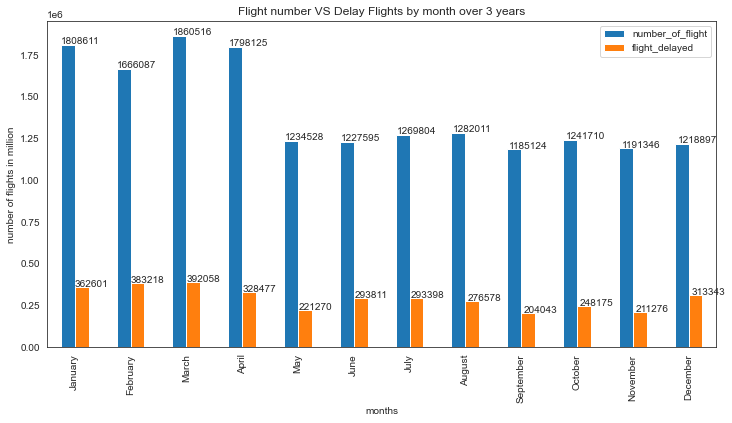

In [42]:
ax = df_months.plot(x='months',kind='bar',figsize=(12,6),title=('Flight number VS Delay Flights by month over 3 years'));
plt.ylabel('number of flights in million');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

### Flight number VS Delay Flights by day of the month from the year 2006 to 2008 

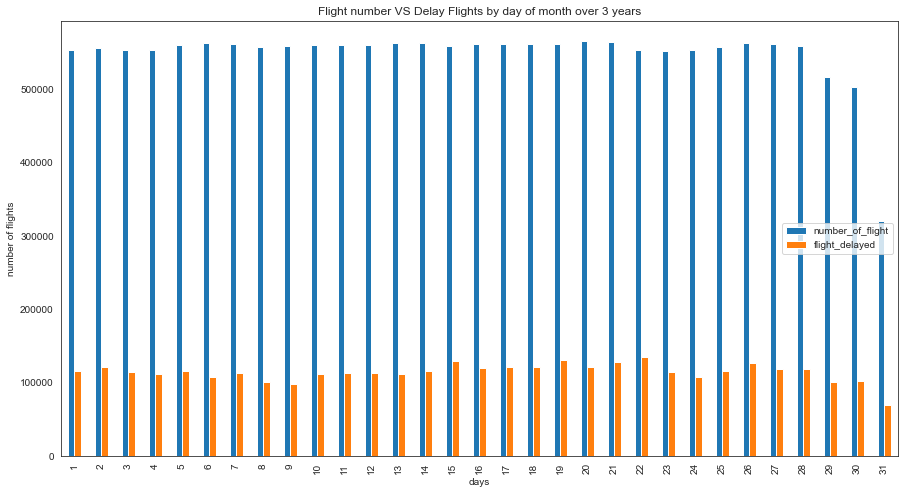

In [43]:
 df_days_of_months.plot(x='days',kind='bar',figsize=(15,8),title=('Flight number VS Delay Flights by day of month over 3 years'));
plt.ylabel('number of flights')
plt.legend(loc=5);

### Flight number VS Delay Flights by day of the week from the year 2006 to 2008 

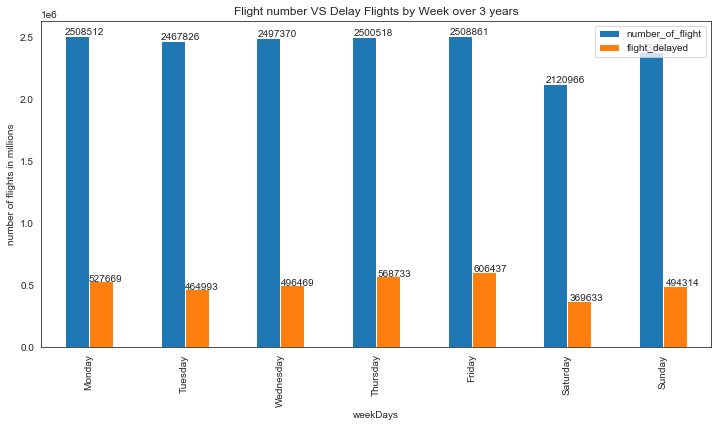

In [44]:
ax = df_weeks.plot(x='weekDays',kind='bar',figsize=(12,6),title=('Flight number VS Delay Flights by Week over 3 years'));
plt.ylabel('number of flights in millions');
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [45]:
all_flights["DepTime"].value_counts()

600.0     46741
700.0     46295
655.0     39004
555.0     34027
630.0     33057
          ...  
2503.0        1
2501.0        1
2458.0        1
2454.0        1
2930.0        1
Name: DepTime, Length: 1552, dtype: int64

In [46]:
range(2500)

range(0, 2500)

### The Rush Time of Day to Travel 

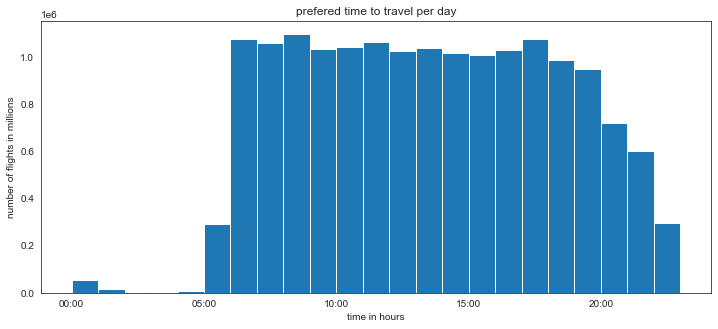

In [47]:
bins = np.arange(0,2400,100)
plt.figure(figsize=(12,5))
plt.hist(data=all_flights , x="DepTime",bins=bins);
plt.title('prefered time to travel per day');
plt.xlabel('time in hours');
plt.ylabel('number of flights in millions');
plt.xticks(np.arange(0,2500,500),['00:00','05:00','10:00','15:00','20:00']);

### Conclusion for preferred time to fly:
<li>March, January and April have highest flight number</li>
<li>Friday has highest number of flights</li>
<li>Most flights occurred daily from 6:AM to 7:00PM</li>


resources  :https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots <br/>
https://stackoverflow.com/questions/43585333/seaborn-countplot-set-legend-for-x-values <br/>
Pandas documentation <br/>
seaborn documentation <br/>
wikipedia.org